# verdadero archivo tesis 04-2019

Importar librerías que se van a utilizar 

In [25]:
import networkx as nx
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Función para detectar visibilidad 

In [2]:
def visibility(G,hp,TS,value,index):
    Nb=index
    Yb=value
    maxslp=1000
    for Na in range(index-1,hp-1,-1):
        Ya=TS[Na]
        slp=(Yb-Ya)/(Nb-Na)
#         print(Nb,Na,slp)
        if slp < maxslp:
            G.add_edge(Nb,Na)
            maxslp=slp

### Ejemplo del algoritmo funcionando de la forma convencional: 

Datos estáticos empleando el algoritmo clásico de visibilidad sin maxlist y varificando límite hasta el primer valor de la serie. 

In [3]:
def visGraph(serie):
    G=nx.Graph()
    for i in range(len(serie)-1,-1,-1):
        visibility(G,0,serie,serie[i],i)
    return G
    

[1 2 7 8 3 6 2 2 1 4 8 7 5 8 1 1 9 8 2 4]


<StemContainer object of 3 artists>

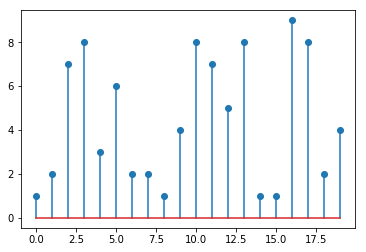

In [4]:
serie=np.random.randint(1,10,20)
print(serie)
plt.stem(serie)

## pruebas del visibility graph en streaming SIN maxlist

Se generan N-window grafos a modo de streaming con ventana deslizante empleando el algoritmo clásico 

In [5]:
def visGraph(serie):
    G=nx.Graph()
    for i in range(len(serie)-1,-1,-1):
        visibility(G,0,serie,serie[i],i)
    return G
    

In [6]:
def visGraphStreaming(serie,window):
    G=nx.Graph()
    for i in range((len(serie)-window+1)):
        G=visGraph(serie[i:window+i])
#         nx.write_gml(G,'./Files/file_'+str(i)+'.gml')

In [7]:
serie=np.random.randint(1,10,20)
serie

array([8, 4, 4, 8, 9, 4, 5, 5, 2, 1, 6, 5, 3, 5, 7, 5, 9, 4, 9, 3])

In [8]:
visGraphStreaming(serie,10)

## Pruebas del Visibility graph en streaming con maxlist

In [9]:
def visibility(G,hp,TS,value,index):
    Nb=index
    Yb=value
    maxslp=1000
    for Na in range(index-1,hp-1,-1):
#         print('---',Na,TS[Na])
        Ya=TS[Na]
        slp=(Yb-Ya)/(Nb-Na)
#         print(Nb,Na,slp)
        if slp < maxslp:
            G.add_edge(Nb,Na)
            maxslp=slp
    return maxslp

In [10]:
def vismax(G,maxslp,value,index,maxlst):
    Nb=index
    Yb=value
    for mx in maxlst[::-1]:
        Na=mx[0]
        Ya=mx[1]
        slp=(Yb-Ya)/(Nb-Na)
#         print(Nb,Yb,Na,Ya,slp,maxslp)
        if slp < maxslp:
            G.add_edge(Nb,Na)
            maxslp=slp
        

In [11]:
def verifyLimit(maxlst,value):
    for mx in maxlst[::-1]:
        if mx[1]<=value:
            maxlst.remove(mx)
#             print(maxlst)
    return maxlst

In [12]:
def visGraphOpt(serie,window):
    G=nx.Graph()
    for i in range(len(serie)-window+1):
        s=serie[i:window+i]
        mx=maxlist(s,[],0)

In [13]:
def newLecture(value,index,maxlst,G,lowerBound=0):
    maxlst=verifyLimit(maxlst,value)
#     print(maxlst)
    if len(maxlst)==0:
        hp=lowerBound
    else:
        hp=maxlst[-1][0]
#     print(index,hp,'...............')
    maxslp=visibility(G,hp,TS,value,index)
    vismax(G,maxslp,value,index,maxlst)
    maxlst.append([index,value])
#     print('............',maxlst)
    

In [14]:
def maxlist(series,lista,index):
    if len(series)==0:
        lista.append((len(series)-1,series))
        
        return lista[:-1]
    else: 
        max_index=np.argmax(series)
        lista.append([max_index+index,np.max(series)])
        index=max_index+1+index
#         print(lista)
        return maxlist(series[max_index+1:],lista, index)

In [15]:
def stream(TS,window):
    G=nx.Graph()
    maxlst=maxlist(TS[:window],[],0)
    for sample in range(len(TS[window:])):
#         print(TS[sample+window],window+sample,maxlst)
        newLecture(TS[sample+window],window+sample,maxlst,G)
    return(G)
        
    

In [16]:
TS=np.random.randint(1,10,50)

In [17]:
H=nx.Graph()
H=stream(TS,1)

# Algoritmo con maxlist sin streaming 

Algoritmo que emplea el concepto de lista ordenada de maximos para datos consolidados 

In [18]:
def realStatic(TS,window=1):
    G=nx.Graph()
    maxlst=maxlist(TS[:window],[],0)
    for sample in range(len(TS[window:])):
#         print(TS[sample+window],window+sample,maxlst)
        newLecture(TS[sample+window],window+sample,maxlst,G)
    return(G)
        

<StemContainer object of 3 artists>

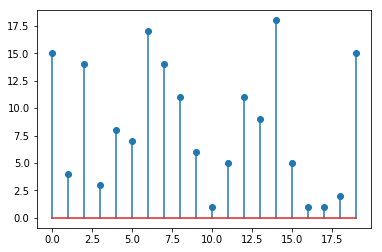

In [19]:
TS=np.random.randint(1,20,20)
plt.stem(TS)

In [20]:
G=realStatic(TS)

In [21]:
G.edges()

EdgeView([(1, 0), (1, 2), (0, 2), (0, 6), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (4, 5), (4, 6), (5, 6), (6, 7), (6, 11), (6, 12), (6, 14), (7, 8), (7, 11), (7, 12), (7, 14), (8, 9), (8, 11), (8, 12), (8, 14), (9, 10), (9, 11), (9, 12), (9, 14), (10, 11), (10, 12), (11, 12), (12, 13), (12, 14), (13, 14), (14, 15), (14, 16), (14, 17), (14, 18), (14, 19), (15, 16), (15, 17), (15, 18), (15, 19), (16, 17), (16, 18), (16, 19), (17, 18), (17, 19), (18, 19)])

# Real Streaming 

In [22]:
def realStreaming(TS,window):
    G=nx.Graph()
    if window>1:
        G=stream(TS[:window],1)
        maxlst=maxlist(TS[:window],[],0)
        for sample in range(len(TS[window:])):
            if maxlst[0][0]<window+sample:
                maxlst.remove(maxlst[0])
            G.remove_node(sample)
            newLecture(TS[sample+window],window+sample,maxlst,G,sample)
#             print(G.edges())
#             nx.write_gml(G,'./Files/'+str(sample)+'_g.gml')
    return(G)
        
    

In [23]:
realStreaming(TS,10)

# Pruebas de Funcionamiento

In [46]:
testlist=[n*500 for n in range(1,15)]

In [47]:
results=[]
for i in range(10):
    for nn in testlist:
#         nn=n*10000
        TS=np.random.randint(1,200,nn)
        start=time.time()
        realStatic(TS)
        stop=time.time()-start
        results.append([nn,stop])
        print(nn,stop)

500 0.009090662002563477
1000 0.02039504051208496
1500 0.033032894134521484
2000 0.0444490909576416
2500 0.05359220504760742
3000 0.038031578063964844
3500 0.08865094184875488
4000 0.1209878921508789
4500 0.09442782402038574
5000 0.10286808013916016
5500 0.11129641532897949
6000 0.10353970527648926
6500 0.17057180404663086
7000 0.20163798332214355
500 0.006632566452026367
1000 0.011767387390136719
1500 0.052362918853759766
2000 0.030382394790649414
2500 0.03752636909484863
3000 0.0408170223236084
3500 0.05147504806518555
4000 0.1320505142211914
4500 0.07742905616760254
5000 0.12787437438964844
5500 0.0891275405883789
6000 0.11355423927307129
6500 0.16649293899536133
7000 0.12090039253234863
500 0.0050830841064453125
1000 0.012666702270507812
1500 0.04530978202819824
2000 0.07450985908508301
2500 0.08563041687011719
3000 0.05443000793457031
3500 0.055513620376586914
4000 0.1147611141204834
4500 0.1108860969543457
5000 0.1015617847442627
5500 0.1313343048095703
6000 0.16037225723266602
6

In [44]:
results=[]
for i in range(10):
    for nn in testlist:
#         nn=n*10000
        TS=np.cumsum(np.random.randint(1,200,nn))
        start=time.time()
        realStatic(TS)
        stop=time.time()-start
        results.append([nn,stop])
        print(nn,stop)

NameError: name 'testlist' is not defined

In [97]:
results=[]
for i in range(10):
    for nn in testlist:
#         nn=n*10000
        TS=np.random.randint(1,200,nn)
#         TS=[round(i*300) for i in TS]
        start=time.time()
        realStatic(TS)
        stop=time.time()-start
        results.append([nn,stop])
        print(nn,stop)

5000 0.08841657638549805
10000 0.20812296867370605
15000 0.38390421867370605
20000 0.6649956703186035
25000 0.8875946998596191
30000 1.2388274669647217
35000 1.7938783168792725
40000 2.2940523624420166
45000 2.441706895828247
50000 3.0151216983795166
55000 3.7751986980438232
60000 4.220872402191162
65000 4.838360786437988
70000 5.658956050872803
75000 5.737581729888916
80000 7.0607590675354
85000 7.616077423095703
90000 9.275046825408936
95000 9.79829454421997
100000 10.732925415039062
105000 12.297193050384521
110000 12.868391990661621
115000 15.375783681869507
120000 15.293855905532837
5000 0.07650160789489746
10000 0.22301435470581055
15000 0.3665432929992676
20000 0.6923637390136719
25000 0.8846378326416016
30000 1.1532461643218994
35000 1.509643316268921
40000 2.1542749404907227
45000 2.3314123153686523
50000 2.802243709564209
55000 3.416574001312256
60000 4.193337440490723
65000 4.374797582626343
70000 5.050262451171875
75000 5.843615293502808
80000 7.292541742324829
85000 7.3770

In [94]:
x=np.random.power(3,10000)
x=[round(i*300) for i in x]

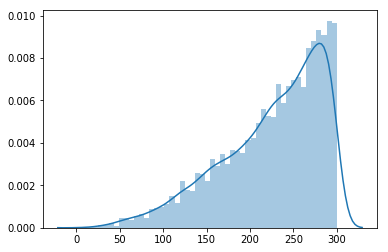

In [95]:
sns.distplot(x,bins=50)

# pruebas nlogn

In [24]:
# Python program for implementation of MergeSort 
def mergeSort(arr): 
    G=nx.Graph()
    for i in arr:
        i=i+1
        i=i-1
        i=i**i
    
    if len(arr) >1: 
        mid = len(arr)//2 #Finding the mid of the array 
        L = arr[:mid] # Dividing the array elements  
        R = arr[mid:] # into 2 halves 
  
        mergeSort(L) # Sorting the first half 
        mergeSort(R) # Sorting the second half 
  
        i = j = k = 0
          
        # Copy data to temp arrays L[] and R[] 
        while i < len(L) and j < len(R): 
            if L[i] < R[j]: 
                arr[k] = L[i] 
                G.add_edge(L[i],R[j])
                i+=1
            else: 
                arr[k] = R[j] 
                j+=1
            k+=1
          
        # Checking if any element was left 
        while i < len(L): 
            arr[k] = L[i] 
            i+=1
            k+=1
          
        while j < len(R): 
            arr[k] = R[j] 
            j+=1
            k+=1
  
    return arr
# Code to print the list 
# def printList(arr): 
#     for i in range(len(arr)):         
#         print(arr[i],end=" ") 
#     print() 
  
# # driver code to test the above code 
# if __name__ == '__main__': 
#     arr = [12, 11, 13, 5, 6, 7]  
#     print ("Given array is", end="\n")  
#     printList(arr) 
#     mergeSort(arr) 
#     print("Sorted array is: ", end="\n") 
#     printList(arr) 
  
# This code is contributed by Mayank Khanna 

In [42]:
mergeSort([1,4,8,3,6,9,6,7])

[1, 3, 4, 6, 6, 7, 8, 9]

In [48]:
results=[]
for i in range(10):
    for nn in testlist:
#         nn=n*10000
        
        TS=np.cumsum(np.random.randint(1,200,nn)[::-1])[::-1]
        start=time.time()
        mergeSort(TS)
        stop=time.time()-start
        results.append([nn,stop])
        print(nn,stop)

5000 0.09270524978637695
10000 0.15882396697998047
15000 0.25069570541381836
20000 0.3392808437347412
25000 0.4525027275085449
30000 0.5101041793823242
35000 0.6254360675811768
40000 0.7096443176269531
45000 0.7859079837799072
50000 0.8973531723022461
55000 0.985374927520752
60000 1.0774552822113037
65000 1.1762444972991943
70000 1.278144121170044
5000 0.08839988708496094
10000 0.15680336952209473
15000 0.24670076370239258
20000 0.3394312858581543
25000 0.44927453994750977
30000 0.5106751918792725
35000 0.6298129558563232
40000 0.7062461376190186
45000 0.8124094009399414
50000 0.895716667175293
55000 1.0031142234802246
60000 1.0834429264068604
65000 1.1754112243652344
70000 1.270622968673706
5000 0.07630133628845215
10000 0.18112444877624512
15000 0.24123454093933105
20000 0.348095178604126
25000 0.44187450408935547
30000 0.515052318572998
35000 0.6173632144927979
40000 0.7038328647613525
45000 0.8104922771453857
50000 0.8943452835083008
55000 0.9895462989807129
60000 1.087756633758545

In [28]:

x=[i* np.log2(i) for i in testlist]

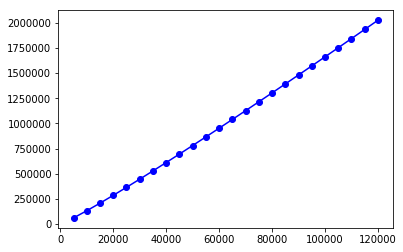

In [33]:
plt.plot(testlist,x,'-ob')

# Pruebas en streaming real 

### pruebas con el algoritmo original. 

In [50]:
serie=np.random.randint(1,200,20)
serie

array([ 88,  62,  16,  51,  12,  43, 156, 113,  98, 149, 191, 117, 163,
       151, 151,  95, 117,  54, 131, 142])

In [51]:
visGraphStreaming(serie,10)

In [ ]:
results=[]
for i in range(10):
    for nn in testlist:

        TS=np.cumsum(np.random.randint(1,2000,nn)[::-1])[::-1]
        start=time.time()
        window=5000
        for j in range(len(TS)-window):
            mergeSort(TS[j:window+j])
        stop=time.time()-start
        results.append([nn,stop])
        print(nn,stop)

5000 6.9141387939453125e-06
10000 404.60823464393616
15000 790.574832201004
20000 1207.104079246521
25000 1576.9417793750763
30000 2026.9560990333557
35000 2413.6066551208496


In [26]:
results=[]
for i in range(10):
    for nn in testlist:

        TS=np.cumsum(np.random.randint(1,2000,nn)[::-1])[::-1]
        start=time.time()
        window=10000
        for j in range(len(TS)-window):
            mergeSort(TS[j:window+j])
        stop=time.time()-start
        results.append([nn,stop])
        print(nn,stop)

5000 5.245208740234375e-06
10000 4.0531158447265625e-06
15000 813.4525098800659
20000 1622.6789872646332


KeyboardInterrupt: 

In [26]:
TS=np.random.randint(1,200,100)

In [39]:
realStreaming(TS,10)

# time tests for real streaming with optimized algorithm 

In [29]:
results=[]
for i in range(10):
    for nn in testlist:

        TS=np.cumsum(np.random.randint(1,200,nn)[::-1])[::-1]
        start=time.time()
        window=500
        realStreaming(TS,1500)
        stop=time.time()-start
        results.append([nn,stop])
        print(nn,stop)

5000 2.78224778175354
10000 5.865471363067627
15000 8.594739198684692
20000 11.49916958808899
25000 14.439351081848145
30000 17.44394326210022
35000 20.573955535888672
40000 23.62071704864502
45000 26.897940158843994
50000 29.402395009994507
55000 32.208672761917114
60000 35.40497612953186
65000 38.13041877746582
70000 41.085083961486816
5000 2.5417745113372803
10000 5.49898099899292
15000 8.46606707572937
20000 11.534358263015747
25000 14.386224269866943
30000 17.343141794204712
35000 20.315749168395996
40000 23.394724130630493
45000 26.384025812149048
50000 29.10714602470398
55000 31.97221541404724
60000 34.95640850067139
65000 37.66549491882324
70000 40.599844217300415
5000 2.511429786682129
10000 5.398767709732056
15000 8.397263288497925
20000 11.305027723312378
25000 14.174690961837769
30000 17.18991994857788
35000 20.092764854431152
40000 23.101832151412964
45000 25.930347681045532
50000 28.868181228637695
55000 31.76353645324707
60000 34.89735746383667
65000 37.57934880256653
70

In [48]:
results=[]
for i in range(10):
    for nn in testlist:

        TS=np.cumsum(np.random.randint(1,200,nn)[::-1])[::-1]
        start=time.time()
        window=500
        realStreaming(TS,1500)
        stop=time.time()-start
        results.append([nn,stop])
        print(nn,stop)

500 0.17297124862670898
1000 0.4996492862701416
1500 0.52950119972229
2000 1.1817853450775146
2500 1.4011425971984863
3000 1.5656530857086182
3500 2.0495407581329346


KeyboardInterrupt: 

In [26]:
results=[]
for i in range(10):
    for nn in testlist:

        TS=np.cumsum(np.random.randint(1,200,nn)[::-1])[::-1]
        start=time.time()
        window=500
        realStreaming(TS,2500)
        stop=time.time()-start
        results.append([nn,stop])
        print(nn,stop)

5000 4.522362470626831
10000 14.877594947814941
15000 22.252445459365845
20000 29.77006220817566
25000 35.00923037528992
30000 37.77596116065979
35000 38.1783721446991
40000 39.437296628952026
45000 44.69034028053284
50000 49.30921506881714
55000 54.24658560752869
60000 59.112632036209106
65000 64.28479552268982
70000 69.41556358337402
5000 3.791905403137207
10000 8.875093698501587
15000 13.774126529693604
20000 18.9431095123291
25000 23.867274522781372
30000 28.955042362213135
35000 39.206570625305176
40000 47.017131328582764
45000 48.68536114692688
50000 63.10235619544983
55000 62.96440887451172
60000 68.15917253494263
65000 71.48754286766052
70000 72.96651816368103
5000 3.87083101272583
10000 9.356464624404907
15000 14.310567140579224
20000 19.483912467956543
25000 24.601163864135742
30000 29.64769721031189
35000 34.86562156677246
40000 40.18211841583252
45000 45.30569911003113
50000 50.47927260398865
55000 58.061124086380005
60000 65.30404233932495
65000 69.44458436965942
70000 71.

# pruebas streaming de algoritmo original

In [27]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,200)
    start=time.time()
    visGraph(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.016965866088867188
0.00834965705871582
0.007856369018554688
0.008429288864135742
0.010848760604858398
0.015038013458251953
0.009476423263549805
0.008771657943725586
0.015137434005737305
0.011316061019897461
0.008810997009277344
0.00880575180053711
0.008072376251220703
0.007890462875366211
0.007889747619628906
0.008056640625
0.007950782775878906
0.008574247360229492
0.00796365737915039
0.00788116455078125


In [28]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,500)
    start=time.time()
    visGraph(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.08658289909362793
0.08021020889282227
0.07654142379760742
0.04761552810668945
0.049330949783325195
0.05616450309753418
0.04766702651977539
0.04721808433532715
0.047888994216918945
0.06145834922790527
0.04693150520324707
0.04833865165710449
0.047589778900146484
0.048468828201293945
0.06311440467834473
0.04722857475280762
0.04713940620422363
0.04708361625671387
0.07228612899780273
0.0816652774810791


In [29]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,1000)
    start=time.time()
    visGraph(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.2793903350830078
0.1893923282623291
0.19671940803527832
0.18936753273010254
0.2477710247039795
0.20997977256774902
0.20031237602233887
0.2062840461730957
0.18909168243408203
0.2214975357055664
0.20015907287597656
0.20203900337219238
0.1974186897277832
0.20278525352478027
0.2140512466430664
0.2036457061767578
0.19596123695373535
0.18858027458190918
0.2044816017150879
0.1875746250152588


In [30]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,1500)
    start=time.time()
    visGraph(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.5504975318908691
0.4331173896789551
0.477679967880249
0.4481236934661865
0.4702887535095215
0.4532022476196289
0.4415256977081299
0.49875545501708984
0.4503324031829834
0.4936072826385498
0.4338819980621338
0.46399927139282227
0.5064005851745605
0.4725608825683594
0.4867241382598877
0.4937624931335449
0.5271210670471191
0.4775350093841553
0.4785499572753906
0.46146297454833984


In [31]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,2000)
    start=time.time()
    visGraph(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.859900712966919
0.8113212585449219
0.8316788673400879
0.8161060810089111
1.03212308883667
0.7821743488311768
0.8050887584686279
0.8733201026916504
0.8617658615112305
0.7647254467010498
0.8054673671722412
0.8676378726959229
0.8849020004272461
0.7642040252685547
0.8433184623718262
0.8174533843994141
0.8273506164550781
0.8081881999969482
0.7892200946807861
0.7915728092193604


In [32]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,5000)
    start=time.time()
    visGraph(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

5.277586460113525
5.7070112228393555
6.435237646102905
4.922039031982422
5.515427589416504
6.56426215171814
5.049370765686035
5.56749701499939
5.106316566467285
4.763545989990234
5.0592546463012695
4.9218738079071045
4.920293807983398
4.73283839225769
4.652636766433716
5.16858434677124
4.9490721225738525
4.808817625045776
4.674964189529419
4.685542345046997


In [33]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,10000)
    start=time.time()
    visGraph(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    

19.81155014038086
19.72189235687256
19.093599796295166
20.684330463409424
20.36001467704773
18.693623542785645
18.850205898284912
20.355103731155396
18.7626690864563
18.954154014587402
18.698374271392822
18.674922943115234
20.373711585998535
21.654109954833984
18.869820833206177
19.528528213500977
20.236207246780396
20.03477907180786
21.193538904190063
21.480931758880615


# pruebas streaming DQ

In [35]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,200)
    start=time.time()
    mergeSort(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.00847935676574707
0.007092952728271484
0.006877422332763672
0.007019996643066406
0.0069200992584228516
0.006928205490112305
0.006559610366821289
0.006715297698974609
0.0060880184173583984
0.006847381591796875
0.009274721145629883
0.004682064056396484
0.0035910606384277344
0.003595590591430664
0.003553152084350586
0.006717205047607422
0.006286144256591797
0.0057239532470703125
0.0035626888275146484
0.003465414047241211


In [36]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,500)
    start=time.time()
    mergeSort(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.02008056640625
0.01950693130493164
0.018352031707763672
0.01879119873046875
0.018314361572265625
0.01879715919494629
0.011820077896118164
0.00968313217163086
0.009763956069946289
0.009730100631713867
0.009104013442993164
0.009552240371704102
0.009226799011230469
0.009328126907348633
0.009294271469116211
0.009169578552246094
0.009220600128173828
0.009212255477905273
0.009125471115112305
0.009364604949951172


In [37]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,1000)
    start=time.time()
    mergeSort(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.025425195693969727
0.02220749855041504
0.02554774284362793
0.025876283645629883
0.02182316780090332
0.020801305770874023
0.021441936492919922
0.020329952239990234
0.019653797149658203
0.019777536392211914
0.019792556762695312
0.0275876522064209
0.029832124710083008
0.024333953857421875
0.02118849754333496
0.0218658447265625
0.020534038543701172
0.020635604858398438
0.019856929779052734
0.021830081939697266


In [38]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,1500)
    start=time.time()
    mergeSort(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.052866458892822266
0.04364728927612305
0.04194808006286621
0.031944990158081055
0.03157663345336914
0.03210568428039551
0.031667470932006836
0.03711342811584473
0.032402753829956055
0.03242373466491699
0.03078627586364746
0.031347036361694336
0.030987262725830078
0.031470537185668945
0.03136134147644043
0.03556942939758301
0.030515193939208984
0.03128862380981445
0.03238940238952637
0.037204742431640625


In [39]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,2000)
    start=time.time()
    mergeSort(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.06351137161254883
0.0533597469329834
0.043538570404052734
0.042929649353027344
0.04311037063598633
0.04358816146850586
0.059814453125
0.057801246643066406
0.04254436492919922
0.04286384582519531
0.04378676414489746
0.05558133125305176
0.0465543270111084
0.0444798469543457
0.06319308280944824
0.060395002365112305
0.08293843269348145
0.05722618103027344
0.04951143264770508
0.045655250549316406


In [40]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,5000)
    start=time.time()
    mergeSort(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.14099884033203125
0.11802411079406738
0.11721372604370117
0.1326007843017578
0.11845731735229492
0.1272416114807129
0.13507437705993652
0.20625853538513184
0.1556870937347412
0.12275552749633789
0.12835121154785156
0.1302785873413086
0.12227964401245117
0.13042640686035156
0.17395520210266113
0.16621685028076172
0.11676025390625
0.12689208984375
0.13751554489135742
0.11952757835388184


In [42]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,10000)
    start=time.time()
    mergeSort(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.30175089836120605
0.2573237419128418
0.292621374130249
0.34303951263427734
0.2723238468170166
0.25409507751464844
0.2608675956726074
0.2628154754638672
0.27259159088134766
0.25568675994873047
0.2549734115600586
0.26127195358276367
0.298703670501709
0.25426721572875977
0.27094340324401855
0.2608814239501953
0.28201842308044434
0.25133419036865234
0.25563955307006836
0.26706528663635254


# Pruebas optimizado 

In [33]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,2000)
    start=time.time()
    realStatic(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.030695676803588867
0.02627277374267578
0.030948638916015625
0.028522729873657227
0.0329890251159668
0.06599664688110352
0.024252653121948242
0.02431321144104004
0.033658742904663086
0.025824308395385742
0.023668766021728516
0.022437334060668945
0.02419304847717285
0.022634506225585938
0.02336907386779785
0.02392125129699707
0.02476644515991211
0.04713153839111328
0.033049583435058594
0.03649020195007324


In [44]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,500)
    start=time.time()
    mergeSort(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.020105838775634766
0.019193649291992188
0.016000032424926758
0.010339736938476562
0.014985322952270508
0.011652469635009766
0.012246847152709961
0.009610891342163086
0.010366439819335938
0.00942540168762207
0.00941610336303711
0.009203195571899414
0.009244680404663086
0.009247779846191406
0.009160041809082031
0.00910043716430664
0.00954580307006836
0.009352922439575195
0.009287357330322266
0.00912022590637207


In [45]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,1000)
    start=time.time()
    mergeSort(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.0441744327545166
0.023919105529785156
0.03114175796508789
0.034635066986083984
0.024323225021362305
0.02068018913269043
0.020078182220458984
0.019640207290649414
0.01983022689819336
0.019751310348510742
0.019635677337646484
0.03415489196777344
0.02129340171813965
0.01987290382385254
0.020149946212768555
0.019943714141845703
0.02015995979309082
0.02035069465637207
0.019725561141967773
0.01968979835510254


In [46]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,1500)
    start=time.time()
    mergeSort(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.03992176055908203
0.055951833724975586
0.03257036209106445
0.03128194808959961
0.03098273277282715
0.031038522720336914
0.03111863136291504
0.03157234191894531
0.03773069381713867
0.03136754035949707
0.031244516372680664
0.031071901321411133
0.031143665313720703
0.03137540817260742
0.03193807601928711
0.0402226448059082
0.030968904495239258
0.031213045120239258
0.031163454055786133
0.03204917907714844


In [47]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,2000)
    start=time.time()
    mergeSort(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.06676173210144043
0.053144216537475586
0.04330158233642578
0.04295802116394043
0.04310035705566406
0.04265928268432617
0.04704022407531738
0.050701141357421875
0.043470144271850586
0.043203115463256836
0.04323697090148926
0.04452943801879883
0.048375606536865234
0.04367542266845703
0.044656991958618164
0.054328203201293945
0.0624394416809082
0.08598613739013672
0.08508849143981934
0.05010819435119629


In [48]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,5000)
    start=time.time()
    mergeSort(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.14180254936218262
0.11877703666687012
0.11879110336303711
0.12119531631469727
0.1228029727935791
0.18290162086486816
0.15285181999206543
0.131242036819458
0.12590837478637695
0.13699746131896973
0.12426090240478516
0.1366415023803711
0.11880111694335938
0.13550233840942383
0.14591407775878906
0.1253519058227539
0.1217503547668457
0.14487266540527344
0.12439084053039551
0.1298661231994629


In [49]:
times=[]
for i in range(20):
    TS=np.random.randint(1,200,10000)
    start=time.time()
    mergeSort(TS)
    stop=time.time()-start
    print(stop)
    times.append(stop)
    
    

0.2782924175262451
0.2508547306060791
0.26240110397338867
0.3182363510131836
0.25862741470336914
0.2532379627227783
0.26456713676452637
0.2759263515472412
0.25496959686279297
0.280872106552124
0.26499414443969727
0.27368950843811035
0.2618427276611328
0.2606375217437744
0.27176833152770996
0.27878260612487793
0.2432551383972168
0.2862548828125
0.34014391899108887
0.2540724277496338


# algoritmo clásico en streaming con append

In [ ]:
results=[]
for i in range(10):
    for nn in testlist:

        TS=np.cumsum(np.random.randint(1,200,nn)[::-1])[::-1]
        start=time.time()
        window=500
        visGraphStreaming(TS,200)
        stop=time.time()-start
        results.append([nn,stop])
        print(nn,stop)

5000 40.488083839416504
10000 84.00003290176392
15000 135.56126856803894
20000 164.1652216911316
25000 221.6323881149292
30000 298.95295429229736
35000 327.8290002346039
40000 360.1471586227417
45000 376.60726952552795
50000 435.8780286312103
55000 456.24064350128174
60000 491.8231325149536
65000 536.5446352958679
70000 574.2600739002228
5000 39.5608434677124
10000 80.53902626037598
15000 121.85374236106873
20000 162.67060017585754
25000 204.77936935424805
30000 250.90503931045532
35000 341.03183007240295
40000 440.1934883594513
45000 512.1252636909485
50000 480.5055420398712
55000 491.2948668003082
60000 495.2085814476013
65000 532.9522366523743
70000 577.7871656417847
5000 39.46269869804382
10000 81.01674246788025
15000 121.4218864440918
20000 163.31798124313354
25000 203.6820867061615
30000 245.91201615333557
35000 286.7303521633148
40000 347.318195104599
45000 369.36301374435425
50000 406.29852962493896
55000 447.1564347743988
60000 522.6141774654388
65000 560.7346823215485
70000 5

# usando Series de FBM 

In [25]:
from fbm import FBM

In [39]:
avgTimes=[]
for i in range(10,90,5):
    print(i)
    times=[]
    f = FBM(n=10000, hurst=i/100, length=1, method='daviesharte')
    for j in range(20):
        TS = f.fbm()
        start=time.time()
        realStatic(TS)
        stop=time.time()-start
        times.append(stop)
    avgTimes.append(np.mean(times))

        

10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85


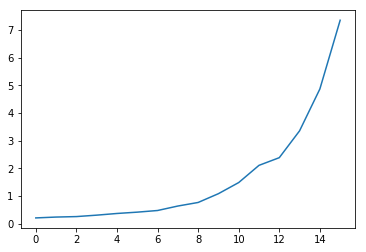

In [40]:
plt.plot(avgTimes)

# B/uffering

In [ ]:
results=[]
for i in range(10):
    for nn in testlist:

        TS=np.cumsum(np.random.randint(1,200,nn)[::-1])[::-1]
        start=time.time()
        window=500
        realStreaming(TS,1500)
        stop=time.time()-start
        results.append([nn,stop])
        print(nn,stop)

In [42]:
def realStreaming(TS,window):
    G=nx.Graph()
    if window>1:
        G=stream(TS[:window],1)
        maxlst=maxlist(TS[:window],[],0)
        for sample in range(len(TS[window:])):
            if maxlst[0][0]<window+sample:
                maxlst.remove(maxlst[0])
            G.remove_node(sample)
            newLecture(TS[sample+window],window+sample,maxlst,G,sample)
#             print(G.edges())
#             nx.write_gml(G,'./Files/'+str(sample)+'_g.gml')
    return(G)
        
    

# real datasets

In [26]:
import pandas as pd
df = pd.read_csv('./TimeSeries/hp.csv')
# saved_column = df.column_name #you can also use df['column_name']

In [27]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1970-01-02,0.30627,0.30627,0.30627,0.30627,2441124,0
1,1970-01-05,0.30627,0.31768,0.30627,0.31385,6219848,0
2,1970-01-06,0.31385,0.31385,0.30996,0.30996,4447522,0
3,1970-01-07,0.31385,0.31385,0.31385,0.31385,1872638,0
4,1970-01-08,0.31385,0.31768,0.31385,0.31385,4280330,0


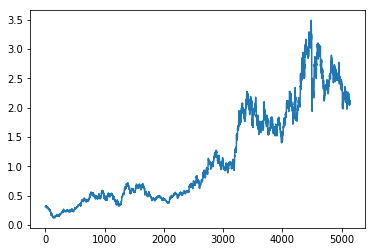

In [28]:
plt.plot(df['Open'])

In [51]:
TS=np.array(df['Open'])

In [55]:
G=realStreaming(TS,1000)

In [56]:
len(x)

5139

In [57]:
len(G.nodes())

1008

In [58]:
len(TS)

5139

In [60]:
G=realStatic(TS)

In [61]:
len(G.nodes())

5139